In [2]:
df=pd.read_csv('social_media.csv')

In [3]:
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,NaN
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


In [4]:
df.isnull().sum()

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

<Axes: xlabel='actual_productivity_score', ylabel='Density'>

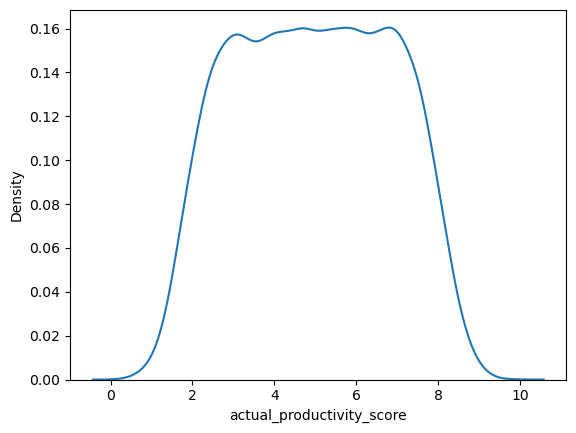

In [8]:
sns.kdeplot(data=df,x=df['actual_productivity_score'])

<Axes: xlabel='actual_productivity_score'>

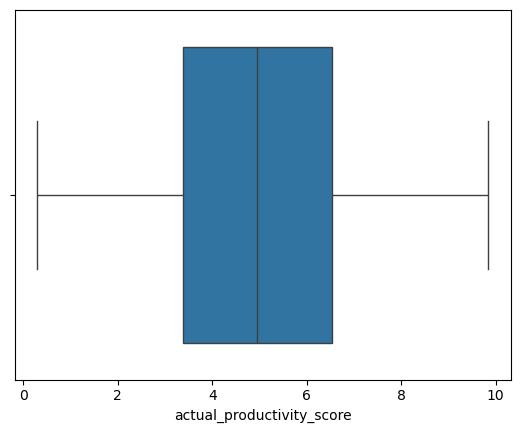

In [9]:
sns.boxplot(data=df,x=df['actual_productivity_score'])

<Axes: xlabel='perceived_productivity_score'>

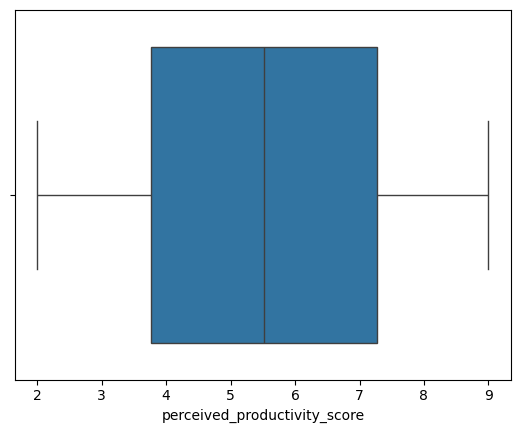

In [10]:
sns.boxplot(data=df,x=df['perceived_productivity_score'])

<Axes: xlabel='stress_level'>

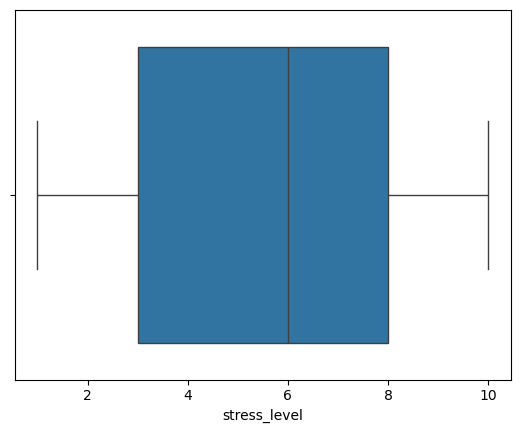

In [11]:
sns.boxplot(data=df,x=df['stress_level'])

<Axes: xlabel='sleep_hours'>

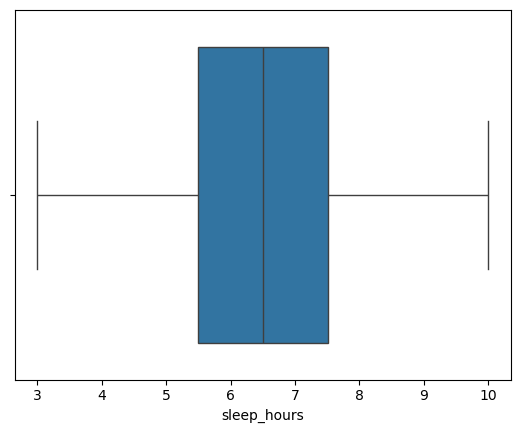

In [12]:
sns.boxplot(data=df,x=df['sleep_hours'])

<Axes: xlabel='screen_time_before_sleep'>

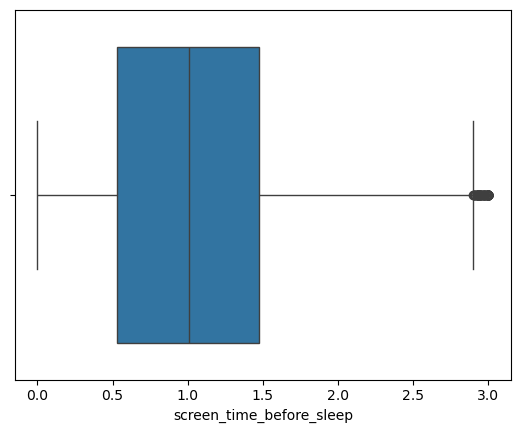

In [13]:
sns.boxplot(data=df,x=df['screen_time_before_sleep'])

In [25]:
df['screen_time_before_sleep'].fillna(round(df['screen_time_before_sleep'].median(),2),inplace=True)

/var/folders/78/8m0ckdcd4x53y6m15gh8jbbc0000gn/T/ipykernel_1993/2709882982.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['screen_time_before_sleep'].fillna(round(df['screen_time_before_sleep'].median(),2),inplace=True)


<Axes: xlabel='screen_time_before_sleep', ylabel='Density'>

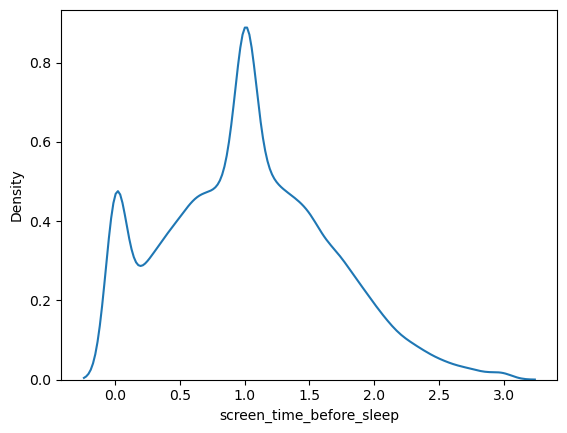

In [26]:
sns.kdeplot(data=df,x=df['screen_time_before_sleep'])

In [27]:
q1=df['screen_time_before_sleep'].quantile(0.25)
q1

np.float64(0.5695687575012153)

In [28]:
q3=df['screen_time_before_sleep'].quantile(0.75)

In [29]:
q3

np.float64(1.435798454665318)

In [30]:
IQR=q3-q1

In [31]:
IQR

np.float64(0.8662296971641027)

In [32]:
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [33]:
lower_fence

np.float64(-0.7297757882449388)

In [34]:
upper_fence

np.float64(2.735143000411472)

In [35]:
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(capping_method='iqr', tail='both', fold=1.5)
df['screen_time_before_sleep'] = winsor.fit_transform(df[['screen_time_before_sleep']])

<Axes: xlabel='screen_time_before_sleep'>

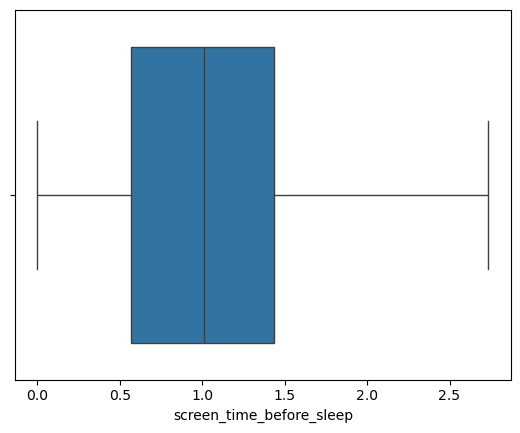

In [36]:
sns.boxplot(data=df,x=df['screen_time_before_sleep'])

In [37]:
# Duplicates

In [41]:
data=pd.DataFrame({
    'A':[1,2,6,1,4,4],
    'B':[1,6,6,1,4,4]
})

In [43]:
data

,A,B
0,1,1
1,2,6
2,6,6
3,1,1
4,4,4
5,4,4


In [44]:
data.duplicated().sum()

np.int64(2)

In [49]:
data.loc[data.duplicated(subset='B'),'B']

2    6
3    1
5    4
Name: B, dtype: int64

In [50]:
data.loc[data.duplicated(subset='A'),'A']

3    1
5    4
Name: A, dtype: int64

In [51]:
data.drop_duplicates()

,A,B
0,1,1
1,2,6
2,6,6
4,4,4


In [52]:
df.duplicated().sum()

np.int64(0)

# Feature Scaling

- feature means columns
- Scaling means making all numerical data into equal range

- Standard Scaling
- Min-Max Scaling
- Robust Scaling

In [55]:
from sklearn.preprocesing import StandardScalar
scalar=StandardScalar()

ModuleNotFoundError: No module named 'sklearn.preprocesing'

In [56]:
# Install the correct package
!pip install scikit-learn


# Standard Scaler

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [58]:
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [60]:
df[['age']]=scaler.fit_transform(df[['age']])

In [61]:
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,1.049017,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,0.326212,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,-0.685715,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,1.338138,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,-1.191679,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.541154,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,NaN
29996,-0.179752,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,0.037090,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,-1.553081,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


# Min-Max Scaling

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [64]:
df[['daily_social_media_time']]=scaler.fit_transform(df[['daily_social_media_time']])

In [65]:
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,1.049017,Male,Unemployed,0.232620,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,0.326212,Male,Health,0.180802,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,-0.685715,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,1.338138,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,-1.191679,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.541154,Female,Health,0.104449,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,NaN
29996,-0.179752,Male,Health,0.246910,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,0.037090,Male,Education,0.986186,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,-1.553081,Female,Education,0.211238,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


In [66]:
num_cols=df.select_dtypes(include=['int','float']).columns
num_cols

Index(['age', 'daily_social_media_time', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score',
       'actual_productivity_score', 'stress_level', 'sleep_hours',
       'screen_time_before_sleep', 'breaks_during_work',
       'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
       'weekly_offline_hours', 'job_satisfaction_score'],
      dtype='object')

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler=MinMaxScaler()

In [70]:
df[num_cols]=scaler.fit_transform(df[num_cols])

In [71]:
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,0.808511,Male,Unemployed,0.232620,Facebook,0.516667,0.562797,0.862995,0.732476,0.333333,0.302364,0.153229,0.8,False,False,0.4,0.354839,0.535267,0.633669
1,0.595745,Male,Health,0.180802,Twitter,0.483333,0.764108,0.437643,0.509797,0.666667,0.300557,0.245515,0.7,True,True,0.2,0.806452,0.000000,0.341243
2,0.297872,Male,Finance,NaN,Twitter,0.450000,0.659246,0.265963,0.332715,0.333333,0.797603,0.228280,0.0,True,False,0.3,0.548387,0.251974,0.247494
3,0.893617,Female,Unemployed,NaN,Facebook,0.483333,0.529586,0.130885,0.154779,0.555556,0.436141,0.440394,0.1,False,False,0.0,0.129032,0.582857,0.173367
4,0.148936,Male,IT,NaN,Telegram,0.600000,0.517841,0.981337,NaN,0.666667,0.343672,0.685980,0.1,False,True,0.1,0.967742,0.260065,0.969306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.340426,Female,Health,0.104449,Facebook,0.483333,0.852197,0.192633,0.331852,0.777778,0.354352,0.516483,0.9,False,False,0.4,0.161290,0.531601,NaN
29996,0.446809,Male,Health,0.246910,Instagram,0.266667,0.391072,0.876247,0.666267,0.777778,0.006485,0.054453,0.3,False,False,0.1,0.935484,0.100364,0.615561
29997,0.510638,Male,Education,0.986186,TikTok,0.566667,0.909586,0.944511,0.875663,0.444444,0.355931,0.447617,1.0,False,False,0.1,0.064516,0.046096,0.628524
29998,0.042553,Female,Education,0.211238,Instagram,0.433333,0.578117,0.823935,0.691011,0.777778,0.545153,0.085730,0.1,False,False,0.2,0.290323,0.305430,0.785471


# Checking with the Watera FIle

In [72]:
data=pd.read_csv('watera.csv')

In [73]:
data

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,7.14,440.98,614.26,2.12,208.39,350.92,7.22,17.32,2.23,0
1,6.41,242.82,387.89,3.93,313.10,153.36,9.92,20.69,2.07,0
2,6.29,133.09,225.55,1.46,332.04,1420.43,8.76,32.87,5.05,0
3,7.39,71.89,459.23,0.56,609.63,24142.89,9.62,42.80,2.26,0
4,6.31,273.01,308.99,0.64,52.59,196.85,1.05,133.38,5.30,0
...,...,...,...,...,...,...,...,...,...,...
99995,5.41,257.02,707.62,0.04,146.47,222.71,7.67,103.63,2.88,0
99996,8.43,360.25,NaN,3.07,267.58,1708.79,0.57,154.33,2.40,0
99997,5.79,429.42,182.79,3.44,60.56,1017.59,6.38,115.63,1.61,0
99998,7.03,95.45,285.10,3.76,722.35,2614.20,10.85,116.46,2.23,0


In [74]:
data.dtypes

ph                 float64
hardness           float64
tds                float64
chlorine           float64
sulfate            float64
conductivity       float64
organic_carbon     float64
trihalomethanes    float64
turbidity          float64
potability           int64
dtype: object

In [75]:
nums=data.select_dtypes(include=['int','float']).columns

In [76]:
nums

Index(['ph', 'hardness', 'tds', 'chlorine', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability'],
      dtype='object')

In [81]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[nums] = scaler.fit_transform(data[nums])


In [82]:
data

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,0.428858,0.400895,0.558411,0.235818,0.260497,0.008780,0.401334,0.075317,0.159400,0.0
1,0.282565,0.220747,0.352613,0.437152,0.391390,0.003837,0.551417,0.089972,0.147963,0.0
2,0.258517,0.120992,0.205026,0.162403,0.415066,0.035544,0.486937,0.142938,0.360972,0.0
3,0.478958,0.065355,0.417470,0.062291,0.762066,0.604146,0.534742,0.186119,0.161544,0.0
4,0.262525,0.248193,0.280883,0.071190,0.065740,0.004925,0.058366,0.580014,0.378842,0.0
...,...,...,...,...,...,...,...,...,...,...
99995,0.082164,0.233657,0.643287,0.004449,0.183094,0.005572,0.426348,0.450644,0.205861,0.0
99996,0.687375,0.327503,NaN,0.341491,0.334488,0.042759,0.031684,0.671117,0.171551,0.0
99997,0.158317,0.390385,0.166151,0.382647,0.075703,0.025463,0.354641,0.502827,0.115082,0.0
99998,0.406814,0.086774,0.259164,0.418242,0.902971,0.065416,0.603113,0.506436,0.159400,0.0


In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [84]:
data[nums]=scaler.fit_transform(data[nums])

In [85]:
data

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,-0.109995,0.592682,1.154470,-0.235179,-0.291392,-0.411358,0.006076,-1.099816,-0.376223,-0.287121
1,-0.843212,-0.298645,0.234397,0.884844,0.393188,-0.460397,0.775824,-1.032937,-0.442409,-0.287121
2,-0.963741,-0.792212,-0.425429,-0.643585,0.517015,-0.145881,0.445117,-0.791219,0.790297,-0.287121
3,0.141107,-1.067490,0.524356,-1.200502,2.331861,5.494362,0.690297,-0.594154,-0.363814,-0.287121
4,-0.943653,-0.162850,-0.086290,-1.150998,-1.309991,-0.449602,-1.752942,1.203449,0.893712,-0.287121
...,...,...,...,...,...,...,...,...,...,...
99995,-1.847619,-0.234773,1.533928,-1.522276,-0.696216,-0.443183,0.134367,0.613046,-0.107344,-0.287121
99996,1.185690,0.229557,NaN,0.352678,0.095584,-0.074303,-1.889787,1.619211,-0.305901,-0.287121
99997,-1.465944,0.540685,-0.599225,0.581633,-1.257884,-0.245875,-0.233402,0.851192,-0.632692,-0.287121
99998,-0.220480,-0.961517,-0.183390,0.779648,3.068809,0.150440,1.040960,0.867664,-0.376223,-0.287121
